In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import kurtosis
from scipy.stats import skew

This is the stock data for Volkswagen in the year 2008. The stock price absolutely shoots up on 28-Oct due to some unexpected news. 

In [2]:
volkswagen_data = pd.read_csv('Datasets/volkswagen.csv', sep=",")

In [3]:
volkswagen_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,153.264999,154.975998,152.048996,152.177002,152.177002,6476
1,2008-01-03,152.602997,152.602997,149.042999,149.834000,149.834000,6985
2,2008-01-04,148.815002,148.815002,146.343002,147.194000,147.194000,22235
3,2008-01-07,146.343002,148.123001,146.343002,147.242996,147.242996,9285
4,2008-01-08,147.134003,148.449997,146.897003,147.085007,147.085007,5490


In [4]:
volkswagen_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
249,2008-12-19,306.529999,307.608002,280.821014,282.799011,282.799011,7611
250,2008-12-22,265.989014,266.019012,251.453995,263.962006,263.962006,2046
251,2008-12-23,262.062988,264.010986,257.040009,257.040009,257.040009,1618
252,2008-12-29,257.040009,257.040009,248.013000,251.285004,251.285004,2030
253,2008-12-30,250.167999,250.167999,247.212006,247.300995,247.300995,830


We only need the adjusted close values.

In [5]:
volkswagen_data = volkswagen_data.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

In [6]:
volkswagen_data.head()

,Date,Adj Close
0,2008-01-02,152.177002
1,2008-01-03,149.834000
2,2008-01-04,147.194000
3,2008-01-07,147.242996
4,2008-01-08,147.085007


In [7]:
volkswagen_data.count()

Date         254
Adj Close    254
dtype: int64

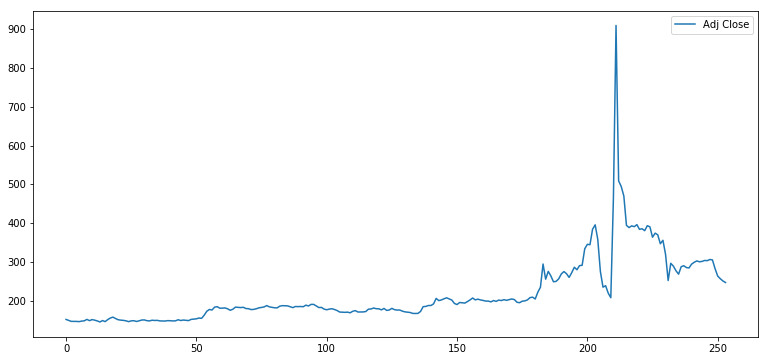

In [8]:
volkswagen_data.plot(figsize=(13,6))
plt.show()

In [9]:
volkswagen_data.dtypes

Date          object
Adj Close    float64
dtype: object

#### Converting the date object to a datetime series,

In [10]:
volkswagen_data['Date'] = pd.to_datetime(volkswagen_data['Date'])

In [11]:
volkswagen_data.dtypes

Date         datetime64[ns]
Adj Close           float64
dtype: object

In [12]:
volkswagen_data = volkswagen_data.sort_values(by='Date')

In [13]:
volkswagen_data.head()

,Date,Adj Close
0,2008-01-02,152.177002
1,2008-01-03,149.834000
2,2008-01-04,147.194000
3,2008-01-07,147.242996
4,2008-01-08,147.085007


#### Calculating returns for the stock prices using the percentage change function

In [14]:
volkswagen_data['Returns'] = volkswagen_data['Adj Close'].pct_change()

In [15]:
volkswagen_data.head()

,Date,Adj Close,Returns
0,2008-01-02,152.177002,NaN
1,2008-01-03,149.834000,-0.015397
2,2008-01-04,147.194000,-0.017619
3,2008-01-07,147.242996,0.000333
4,2008-01-08,147.085007,-0.001073


In [16]:
volkswagen_data = volkswagen_data.dropna()

In [17]:
volkswagen_data.head()

,Date,Adj Close,Returns
1,2008-01-03,149.834000,-0.015397
2,2008-01-04,147.194000,-0.017619
3,2008-01-07,147.242996,0.000333
4,2008-01-08,147.085007,-0.001073
5,2008-01-09,146.541000,-0.003699


In [18]:
volkswagen_data.count()

Date         253
Adj Close    253
Returns      253
dtype: int64

#### Finding the skewness and kurtosis for this set using functions from the scipy library

In [19]:
skew(volkswagen_data['Returns'])

7.7043009107738385

In [20]:
kurtosis(volkswagen_data['Returns'])

81.3985824118732

#### We can see that the skewness and kurtosis is pretty high. Lets remove data around the 29th of October, where there was a sudden peak

In [21]:
volkswagen_data_modified = volkswagen_data[(volkswagen_data['Date'] < '2008-10-27') \
                                | (volkswagen_data['Date'] > '2008-11-02')]

volkswagen_data_modified.count()

Date         248
Adj Close    248
Returns      248
dtype: int64

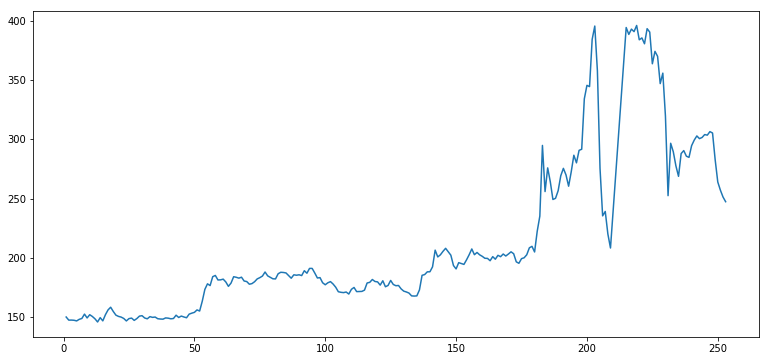

In [22]:
volkswagen_data_modified['Adj Close'].plot(figsize=(13,6))
plt.show()

In [23]:
skew(volkswagen_data_modified['Returns'])

-0.25188817928192714

In [24]:
kurtosis(volkswagen_data_modified['Returns'])

12.497164932827658

As sudden changes in data have been filtered out, we are left with a smooth data transition, for which skewness and kurtosis values are not too high.

If you are working with a dataset, you can also apply these functions directly on it to find the skew and kurtosis for all variables in the dataset

In [25]:
absentees_data = pd.read_csv('datasets/Absenteeism_at_work.csv',
                             sep=r'\s*;\s*', 
                             engine='python')

In [26]:
absentees_data.skew()

ID                                 0.016606
Reason for absence                -0.915312
Month of absence                   0.069369
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Work load Average/day              0.961457
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          2.108953
Son                                1.086465
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
Absenteeism time in hours          5.720728
dtype: float64

In [27]:
absentees_data.kurtosis()

ID                                 -1.251818
Reason for absence                 -0.259925
Month of absence                   -1.254967
Day of the week                    -1.286406
Seasons                            -1.345190
Transportation expense             -0.318291
Distance from Residence to Work    -1.261683
Service time                        0.683111
Age                                 0.431613
Work load Average/day               0.618188
Hit target                          2.419042
Disciplinary failure               13.657345
Education                           2.988465
Son                                 0.748326
Social drinker                     -1.930517
Social smoker                       8.850204
Pet                                 9.674827
Weight                             -0.913928
Height                              7.317235
Body mass index                    -0.314375
Absenteeism time in hours          38.777307
dtype: float64

The gain parameter has the highest peak